In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

%matplotlib inline


In [36]:
churn_ds = pd.read_csv('/Users/aruniscrazy/Desktop/myWorks/ml_learns/dataset/churning/Telco-Customer-Churn.csv')
churn_ds.shape

(7043, 21)

In [37]:
churn_ds.loc[churn_ds.Churn=='No','Churn'] = 0
churn_ds.loc[churn_ds.Churn=='Yes','Churn'] = 1

In [38]:
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']

for i in cols:
    churn_ds[i]=churn_ds[i].replace({'No internet service' : 'No'})

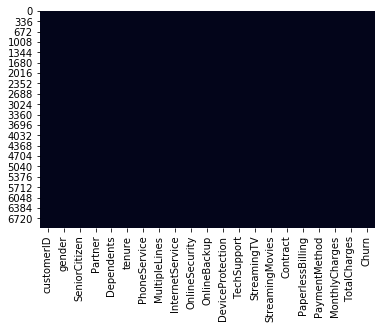

In [39]:
sns.heatmap(churn_ds.isnull(), cbar=False)


In [40]:
churn_ds.head(5)
churn_ds['Churn'].value_counts() 
#Perform One Hot Encoding using get_dummies method
churn_ds = pd.get_dummies(churn_ds, columns = ['Contract','Dependents','DeviceProtection',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)


In [93]:
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale

standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure']

#Apply the feature scaling operation on dataset using fit_transform() method
churn_ds[columns_for_ft_scaling] = standardScaler.fit_transform(churn_ds[columns_for_ft_scaling])



In [94]:
y = churn_ds['Churn']
X = churn_ds.drop(['Churn','customerID','TotalCharges','MonthlyCharges','gender'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
y_test.value_counts()

0    1560
1     553
Name: Churn, dtype: int64

In [95]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 1316
Before OverSampling, counts of label '0': 3614 

After OverSampling, the shape of train_X: (7228, 21)
After OverSampling, the shape of train_y: (7228,) 

After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '0': 3614


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train_res,y_train_res.ravel())

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
#logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [106]:
#Generate confusion matrix for logistics regression model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[1154,  406],
       [ 135,  418]])

In [105]:

print(conf_mat_logmodel) 
print ('Accuracy Score :',accuracy_score(y_test, pred))
print ('Report : ')
print (classification_report(y_test, pred))

[[1154  406]
 [ 135  418]]
Accuracy Score : 0.7439659252247989
Report : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1560
           1       0.51      0.76      0.61       553

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.76      2113



In [102]:
import collections

collections.Counter(pred)

Counter({0: 1289, 1: 824})

In [103]:
churn_dataset['Probability_of_Churn'] = logmodel.predict_proba(churn_dataset[X_test.columns])[:,1]
#churn_dataset.sort_values(['customerID','Probability_of_Churn'],  ascending=[False,False])
churn_prediction=churn_dataset[['customerID','Churn','Probability_of_Churn']]
churn_prediction.sort_values(['Probability_of_Churn','Churn','customerID'], ascending=[False,False,False]).head(10)
#churn_prediction.shape

,customerID,Churn,Probability_of_Churn
3209,8149-RSOUN,Yes,0.939752
2577,4910-GMJOT,Yes,0.939752
6866,0295-PPHDO,Yes,0.939752
1148,7851-WZEKY,Yes,0.938334
969,3158-MOERK,Yes,0.938334
3727,9057-SIHCH,Yes,0.936884
1976,9497-QCMMS,Yes,0.936170
4800,9300-AGZNL,Yes,0.936170
6482,5419-JPRRN,Yes,0.934814
1410,7024-OHCCK,Yes,0.934674
